In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 微分

In [6]:
def numerical_diff(f, x):
    h = 0.00001
    return (f(x+h) - f(x-h)) / (2*h)

def tangent_line(f, x):
    p = 5
    return numerical_diff(f, p) * (x - p) + f(p)

def function1(x):
    return x**3

print(numerical_diff(function1, 2))

12.00000000021184


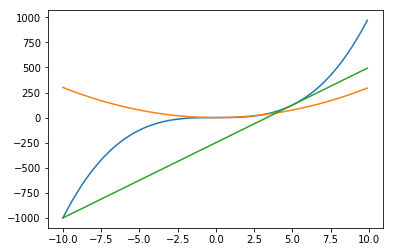

In [7]:
# plot
x1 = np.arange(-10, 10, 0.1)

plt.plot(x1, function1(x1))
plt.plot(x1, numerical_diff(function1, x1))
plt.plot(x1, tangent_line(function1, x1))
plt.show()

## 偏微分

In [10]:
def numerical_gradient(f, x):
    h = 0.00001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad


def function2(x):
    return x[0]**2 + x[1]**2


def plot3d_function(f):
    x = np.linspace(-20, 20, 1000)
    y = np.linspace(-20, 20, 1000)
    x1, x2 = np.meshgrid(x, y)
    x3 = f([x1, x2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, x3)

print(numerical_gradient(function2, np.array([3.0, 4.0])))

[6. 8.]


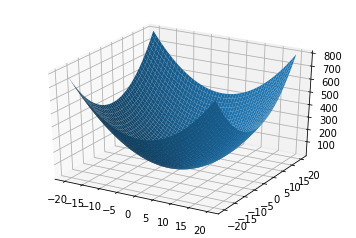

In [6]:
plot3d_function(function2)

## 勾配法

In [19]:
def function3(x):
    return x**2

def gradient_descent(f, init_x, lr=0.1, step_num=20):
    x = init_x
    pos = []
    for i in range(step_num):
        pos.append(x)
        grad = numerical_diff(f, x)
        x -= lr * grad
    return pos


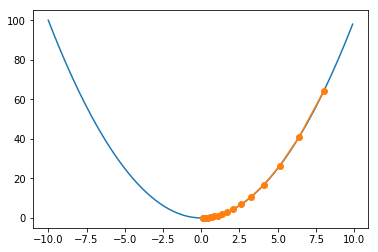

In [20]:
x1 = np.arange(-10, 10, 0.1)

g = gradient_descent(function3, 8)
g = np.array(g)

plt.plot(x1, function3(x1))
plt.plot(g, function3(g), marker="o")
plt.show()